In [16]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
mae = 'test_neg_mean_absolute_error'
var = 'test_explained_variance'
acc = 'test_accuracy'
alg = 'algorithm'

In [8]:
#results/19jul2018/
low_rxtr_scr = pd.read_csv('../trainset_1_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
low_burn_scr = pd.read_csv('../trainset_1_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
low_enri_scr = pd.read_csv('../trainset_1_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
low_cool_scr = pd.read_csv('../trainset_1_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

low_burn_scr['Score'] = low_burn_scr[var]
low_cool_scr['Score'] = low_cool_scr[var]
low_enri_scr['Score'] = low_enri_scr[var]
low_rxtr_scr['Score'] = low_rxtr_scr[acc]

low_burn_scr['MAE'] = low_burn_scr[mae]
low_cool_scr['MAE'] = low_cool_scr[mae]
low_enri_scr['MAE'] = low_enri_scr[mae]

#rxtr_scr = pd.read_csv('../results/19jul2018/trainset_2_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
#burn_scr = pd.read_csv('../results/19jul2018/trainset_2_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
#enri_scr = pd.read_csv('../results/19jul2018/trainset_2_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
#cool_scr = pd.read_csv('../trainset_2_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

,CV_fold,fit_time,score_time,test_explained_variance,test_neg_mean_absolute_error,algorithm,Score,MAE
27,7,0.755002,0.073503,0.999707,-35.348563,svr,0.999707,-35.348563
17,7,0.003636,0.001101,1.000000,-0.465195,rr,1.000000,-0.465195
21,1,0.800573,0.073401,0.999584,-37.529184,svr,0.999584,-37.529184
2,2,0.003336,0.011704,0.999967,-7.611162,knn,0.999967,-7.611162
3,3,0.003287,0.011838,0.999974,-7.214527,knn,0.999974,-7.214527
4,4,0.003224,0.011794,0.999926,-14.549559,knn,0.999926,-14.549559
22,2,0.797616,0.072507,0.999660,-26.040613,svr,0.999660,-26.040613
29,9,0.746682,0.072487,0.999568,-37.506451,svr,0.999568,-37.506451
28,8,0.758397,0.073320,0.999722,-37.694791,svr,0.999722,-37.694791
1,1,0.003313,0.011503,0.999956,-7.939545,knn,0.999956,-7.939545


In [15]:
# knn
low_knn_b = low_burn_scr['Score'].loc[low_burn_scr['algorithm']=='knn']
low_knn_c = low_cool_scr['Score'].loc[low_cool_scr['algorithm']=='knn']
low_knn_e = low_enri_scr['Score'].loc[low_enri_scr['algorithm']=='knn']
low_knn_r = low_rxtr_scr['Score'].loc[low_rxtr_scr['algorithm']=='knn']
# rr
low_rr_b = low_burn_scr['Score'].loc[low_burn_scr['algorithm']=='rr']
low_rr_c = low_cool_scr['Score'].loc[low_cool_scr['algorithm']=='rr']
low_rr_e = low_enri_scr['Score'].loc[low_enri_scr['algorithm']=='rr']
low_rr_r = low_rxtr_scr['Score'].loc[low_rxtr_scr['algorithm']=='rr']
# svr
low_svr_b = low_burn_scr['Score'].loc[low_burn_scr['algorithm']=='svr']
low_svr_c = low_cool_scr['Score'].loc[low_cool_scr['algorithm']=='svr']
low_svr_e = low_enri_scr['Score'].loc[low_enri_scr['algorithm']=='svr']
low_svr_r = low_rxtr_scr['Score'].loc[low_rxtr_scr['algorithm']=='svr']

In [32]:
parameters = norm.fit(low_knn_e)
x = np.linspace(0, 1, 100)
normal_pdf = norm.pdf(x)
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])

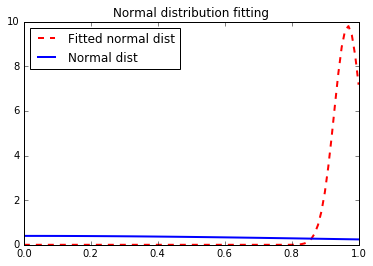

In [33]:
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
#plt.hist(low_svr_b,normed=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting")
plt.legend(loc=2)
#plt.ylim((0, 1))
plt.show()

In [ ]:
burn = burn_scr.loc[:, [alg, var]]
cool = cool_scr.loc[:, [alg, var]]
enri = enri_scr.loc[:, [alg, var]]
rxtr = rxtr_scr.loc[:, [alg, acc]]

burn['Score'] = burn[var]
cool['Score'] = cool[var]
enri['Score'] = enri[var]
rxtr['Score'] = rxtr[acc]

In [ ]:
low_burn = low_burn_scr.loc[:, [alg, mae]]
low_cool = low_cool_scr.loc[:, [alg, mae]]
low_enri = low_enri_scr.loc[:, [alg, mae]]

burn = burn_scr.loc[:, [alg, mae]]
cool = cool_scr.loc[:, [alg, mae]]
enri = enri_scr.loc[:, [alg, mae]]